In [1]:
# For Sam

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loading the dataset

In [3]:
dataset = pd.read_csv("Train.csv")

Checking it out

In [4]:
dataset.head(2)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993


In [5]:
riders = pd.read_csv('Riders.csv')
riders.head(2)

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176


In [6]:
# from datetime import datetime
# dataset['Placement - Time'].apply(lambda time: \
#     (datetime.strptime(\
#         str(datetime.strptime(time, '%I:%M:%S %p') - datetime(1900,1,1)), '%H:%M:%S')\
#         ).minute)
        

In [7]:
dataset.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

dropping User Id

In [8]:
X = dataset.drop(columns=['Time from Pickup to Arrival', 'User Id', 'Arrival at Destination - Time']) 
y = dataset['Time from Pickup to Arrival']

In [9]:
X.head(2)

,Order No,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,...,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_4211,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,...,9,5,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432
1,Order_No_25375,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,...,12,5,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856


Set Order No to be index

In [10]:
#X.set_index('Order No', inplace=True)

In [11]:
X.head(2)

,Order No,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,...,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_4211,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,...,9,5,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432
1,Order_No_25375,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,...,12,5,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856


Join riders to X

In [12]:
X = X.merge(riders, how='left', on=['Rider Id'])
X.drop(columns=['Rider Id'], inplace=True)
X.head(2)

,Order No,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,...,Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,...,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,1637,1309,13.8,549
1,Order_No_25375,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,...,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,396,339,13.6,69


In [13]:
def one_encoder(input_df, columns):
    
    return pd.get_dummies(input_df, drop_first=True, columns=columns, dtype=float)

In [14]:
X = one_encoder(X, ['Platform Type', 'Personal or Business'])

Now things are about to get ugly

In [15]:
X.columns

Index(['Order No', 'Vehicle Type', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)', 'Distance (KM)',
       'Temperature', 'Precipitation in millimeters', 'Pickup Lat',
       'Pickup Long', 'Destination Lat', 'Destination Long', 'No_Of_Orders',
       'Age', 'Average_Rating', 'No_of_Ratings', 'Platform Type_2',
       'Platform Type_3', 'Platform Type_4', 'Personal or Business_Personal'],
      dtype='object')

In [16]:
### START FUNCTION
def cleaner(input_df, threshold, similarity_threshold, day_of_month_cols, day_of_week_cols):
    input_dfc = input_df.copy()
    

    #######################################################################################################################
    # The Code below drops columns that have null values exceeding threshold and Columns that have ONLY one value
    for col in input_df.columns:
        if (sum(input_df[col].isnull())*100/len(input_df[col]) > threshold) or (len(input_df[col].unique()) == 1):
            if (sum(input_df[col].isnull())*100/len(input_df[col]) > threshold):
                print(f'Dropping "{col}" column for null values exceeding {threshold}%')
            else:
                print(f'Dropping "{col}" column for only having 1 value: {dataset[col].unique()[0]}')
            input_dfc.drop(columns=[col], inplace=True) 
            
    ########################################################################################################################

    ########################################################################################################################
    # This code drops columns that are similarity_threshold% similar
    input_dfc2 = input_dfc.copy()
    for col in input_dfc.columns:
        for second_col in [x for x in input_dfc2.columns if x != col]:
            if col in input_dfc2.columns and sum(input_dfc2[col] == input_dfc2[second_col])*100/len(input_dfc2[col]) > similarity_threshold:
                print(f'Dropping "{col}" column because it is {similarity_threshold}% similar to {second_col} to avoid colinearity')
                input_dfc2.drop(columns=[col], inplace=True) 
                

    ########################################################################################################################

    ########################################################################################################################
    # This code converts time given by am and pm into seconds
    # def time_to_seconds(input_df):
    #     input_dfc = input_df.copy()

    #     from datetime import datetime

    #     for time_col in [col for col in input_df.columns if 'Time' in [col[-4:]]]:

    #         input_dfc[time_col] = input_df[time_col].apply(lambda time: (datetime.strptime(time, '%I:%M:%S %p') - datetime(1900,1,1)).total_seconds())

    #     return input_dfc

    # input_dfc2 = time_to_seconds(input_dfc2)
    ########################################################################################################################

    ########################################################################################################################
    # I have decided against the time to seconds function, but instead to consider time as a cyclic feature 
    # http://blog.davidkaleko.com/feature-engineering-cyclical-features.html 

    def cyclic_time(input_df):
        input_dfc = input_df.copy()

        from datetime import datetime

        for time_col in [col for col in input_df.columns if 'Time' in [col[-4:]]]:

            input_dfc[time_col + '_sin(hrs)'] = input_df[time_col].apply(lambda time: np.sin(\
            (datetime.strptime(\
                str(datetime.strptime(time, '%I:%M:%S %p') - datetime(1900,1,1)), '%H:%M:%S')\
                ).hour * (2.*np.pi/24))\
                ) 
        
            input_dfc[time_col + '_cos(hrs)'] = input_df[time_col].apply(lambda time: np.cos(\
            (datetime.strptime(\
                str(datetime.strptime(time, '%I:%M:%S %p') - datetime(1900,1,1)), '%H:%M:%S')\
                ).hour * (2.*np.pi/24))\
                ) 

            input_dfc[time_col + '_sin(mins)'] = input_df[time_col].apply(lambda time: np.sin(\
            (datetime.strptime(\
                str(datetime.strptime(time, '%I:%M:%S %p') - datetime(1900,1,1)), '%H:%M:%S')\
                ).minute * (2.*np.pi/60))\
                )

            input_dfc[time_col + '_cos(mins)'] = input_df[time_col].apply(lambda time: np.cos(\
            (datetime.strptime(\
                str(datetime.strptime(time, '%I:%M:%S %p') - datetime(1900,1,1)), '%H:%M:%S')\
                ).minute * (2.*np.pi/60))\
                )  

            input_dfc[time_col + '_sin(secs)'] = input_df[time_col].apply(lambda time: np.sin(\
            (datetime.strptime(\
                str(datetime.strptime(time, '%I:%M:%S %p') - datetime(1900,1,1)), '%H:%M:%S')\
                ).second * (2.*np.pi/60))\
                )

            input_dfc[time_col + '_cos(secs)'] = input_df[time_col].apply(lambda time: np.cos(\
            (datetime.strptime(\
                str(datetime.strptime(time, '%I:%M:%S %p') - datetime(1900,1,1)), '%H:%M:%S')\
                ).second * (2.*np.pi/60))\
                )

            input_dfc.drop(columns=[time_col], inplace=True)

        return input_dfc

    input_dfc2 = cyclic_time(input_dfc2)

    ########################################################################################################################
    #

    def cyclic_days(input_df, month_days_cols, weekdays_cols):
        input_dfc = input_df.copy()


        for mday_col in month_days_cols:
            if mday_col in input_dfc.columns:

                input_dfc[mday_col + '_sin(day)'] = input_df[mday_col].apply(lambda day: np.sin(\
                day * (2.*np.pi/31))\
                    )

                input_dfc[mday_col + '_cos(day)'] = input_df[mday_col].apply(lambda day: np.cos(\
                day * (2.*np.pi/31))\
                    )

                input_dfc.drop(mday_col, inplace=True, axis=1)
            
            
        for wday_col in weekdays_cols:
            if wday_col in input_dfc.columns:

                input_dfc[wday_col + '_sin(day)'] = input_df[wday_col].apply(lambda day: np.sin(\
                day * (2.*np.pi/7))\
                    )
                
                input_dfc[wday_col + '_cos(day)'] = input_df[wday_col].apply(lambda day: np.cos(\
                day * (2.*np.pi/7))\
                    )

                input_dfc.drop(wday_col, inplace=True, axis=1)
            else:
                continue

        return input_dfc
    ########################################################################################################################

    input_dfc2 = cyclic_days(input_dfc2, day_of_month_cols, day_of_week_cols)    

    print(f"Total of {len([x for x in input_df.columns if x not in input_dfc2])} columns dropped \n")  
    print([x for x in input_df.columns if x not in input_dfc2])

    return input_dfc2

### END FUNCTION

 Actually for the first model, I will drop the 'Arrival at Destination - Time' column, I believe it is directly linked to the predicted y
 As y is the difference between the 'Arrival at Destination - Time' and 'Pick up time'

Now we apply our ultimate cleaner

In [17]:
day_of_month_cols = [x for x in X.columns if x[-5:] == 'Month']
day_of_week_cols = [x for x in X.columns if x[-(len('(Mo = 1)')):] == '(Mo = 1)']
X = cleaner(X, 40, 90, day_of_month_cols, day_of_week_cols)


Dropping "Vehicle Type" column for only having 1 value: Bike
Dropping "Precipitation in millimeters" column for null values exceeding 40%
Dropping "Placement - Day of Month" column because it is 90% similar to Confirmation - Day of Month to avoid colinearity
Dropping "Placement - Weekday (Mo = 1)" column because it is 90% similar to Confirmation - Weekday (Mo = 1) to avoid colinearity
Dropping "Confirmation - Day of Month" column because it is 90% similar to Arrival at Pickup - Day of Month to avoid colinearity
Dropping "Confirmation - Weekday (Mo = 1)" column because it is 90% similar to Arrival at Pickup - Weekday (Mo = 1) to avoid colinearity
Dropping "Arrival at Pickup - Day of Month" column because it is 90% similar to Pickup - Day of Month to avoid colinearity
Dropping "Arrival at Pickup - Weekday (Mo = 1)" column because it is 90% similar to Pickup - Weekday (Mo = 1) to avoid colinearity
Dropping "Pickup - Day of Month" column because it is 90% similar to Arrival at Destination 

In [18]:
X.head(2)

,Order No,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,...,Pickup - Time_sin(hrs),Pickup - Time_cos(hrs),Pickup - Time_sin(mins),Pickup - Time_cos(mins),Pickup - Time_sin(secs),Pickup - Time_cos(secs),Arrival at Destination - Day of Month_sin(day),Arrival at Destination - Day of Month_cos(day),Arrival at Destination - Weekday (Mo = 1)_sin(day),Arrival at Destination - Weekday (Mo = 1)_cos(day)
0,Order_No_4211,4,20.4,-1.317755,36.830370,-1.300406,36.829741,1637,1309,13.8,...,0.500000,-0.866025,0.309017,-0.951057,1.224647e-16,-1.000000,0.968077,-0.250653,-0.974928,-0.222521
1,Order_No_25375,16,26.4,-1.351453,36.899315,-1.295004,36.814358,396,339,13.6,...,0.258819,-0.965926,-0.994522,-0.104528,8.090170e-01,0.587785,0.651372,-0.758758,-0.974928,-0.222521


In [19]:
X['Temperature'].median()

23.5

In [20]:
X['Temperature'].mode()

0    24.7
dtype: float64

In [21]:
X['Temperature'].mean()

23.25888921888938

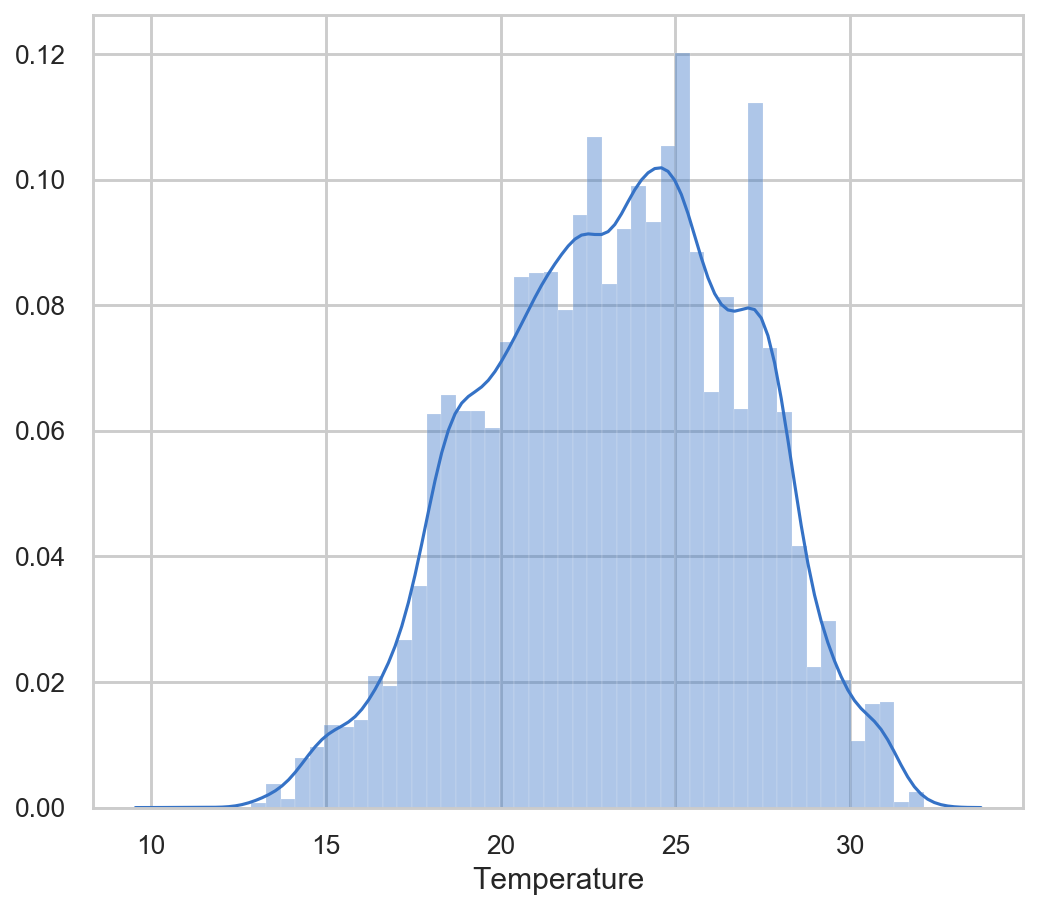

In [22]:
sns.distplot(X['Temperature'])
plt.show()

In [23]:
X['Temperature'].fillna(X['Temperature'].median(), inplace=True)

In [24]:
X.head(5)

,Order No,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,No_Of_Orders,Age,Average_Rating,...,Pickup - Time_sin(hrs),Pickup - Time_cos(hrs),Pickup - Time_sin(mins),Pickup - Time_cos(mins),Pickup - Time_sin(secs),Pickup - Time_cos(secs),Arrival at Destination - Day of Month_sin(day),Arrival at Destination - Day of Month_cos(day),Arrival at Destination - Weekday (Mo = 1)_sin(day),Arrival at Destination - Weekday (Mo = 1)_cos(day)
0,Order_No_4211,4,20.4,-1.317755,36.830370,-1.300406,36.829741,1637,1309,13.8,...,5.000000e-01,-0.866025,0.309017,-0.951057,1.224647e-16,-1.000000,0.968077,-0.250653,-0.974928,-0.222521
1,Order_No_25375,16,26.4,-1.351453,36.899315,-1.295004,36.814358,396,339,13.6,...,2.588190e-01,-0.965926,-0.994522,-0.104528,8.090170e-01,0.587785,0.651372,-0.758758,-0.974928,-0.222521
2,Order_No_1899,3,23.5,-1.308284,36.843419,-1.300921,36.828195,1023,242,12.5,...,1.224647e-16,-1.000000,-0.669131,0.743145,3.090170e-01,0.951057,-0.201299,0.979530,0.974928,-0.222521
3,Order_No_9336,9,19.2,-1.281301,36.832396,-1.257147,36.795063,886,283,14.5,...,7.071068e-01,-0.707107,-0.978148,-0.207912,5.877853e-01,0.809017,0.101168,-0.994869,-0.974928,-0.222521
4,Order_No_27883,9,15.4,-1.266597,36.792118,-1.295041,36.809817,2311,872,14.1,...,5.000000e-01,-0.866025,0.500000,0.866025,6.691306e-01,-0.743145,0.485302,-0.874347,0.781831,0.623490


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 42 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Order No                                            21201 non-null  object 
 1   Distance (KM)                                       21201 non-null  int64  
 2   Temperature                                         21201 non-null  float64
 3   Pickup Lat                                          21201 non-null  float64
 4   Pickup Long                                         21201 non-null  float64
 5   Destination Lat                                     21201 non-null  float64
 6   Destination Long                                    21201 non-null  float64
 7   No_Of_Orders                                        21201 non-null  int64  
 8   Age                                                 21201 non-null  int64  


In [26]:
cyclic_days(X, ['Placement - Day of Month'], ['Placement - Weekday (Mo = 1)']).head()

NameError: name 'cyclic_days' is not defined

In [27]:
def cyclic_time(input_df):
        input_dfc = input_df.copy()

        from datetime import datetime

        for time_col in [col for col in input_df.columns if 'Time' in [col[-4:]]]:

            input_dfc[time_col + '_sin(hrs)'] = input_df[time_col].apply(lambda time: np.sin(\
            (datetime.strptime(\
                str(datetime.strptime(time, '%I:%M:%S %p') - datetime(1900,1,1)), '%H:%M:%S')\
                ).hour * (2.*np.pi/24))\
                ) 
        
            input_dfc[time_col + '_cos(hrs)'] = input_df[time_col].apply(lambda time: np.cos(\
            (datetime.strptime(\
                str(datetime.strptime(time, '%I:%M:%S %p') - datetime(1900,1,1)), '%H:%M:%S')\
                ).hour * (2.*np.pi/24))\
                ) 

            input_dfc[time_col + '_sin(mins)'] = input_df[time_col].apply(lambda time: np.sin(\
            (datetime.strptime(\
                str(datetime.strptime(time, '%I:%M:%S %p') - datetime(1900,1,1)), '%H:%M:%S')\
                ).minute * (2.*np.pi/60))\
                )

            input_dfc[time_col + '_cos(mins)'] = input_df[time_col].apply(lambda time: np.cos(\
            (datetime.strptime(\
                str(datetime.strptime(time, '%I:%M:%S %p') - datetime(1900,1,1)), '%H:%M:%S')\
                ).minute * (2.*np.pi/60))\
                )  

            input_dfc[time_col + '_sin(secs)'] = input_df[time_col].apply(lambda time: np.sin(\
            (datetime.strptime(\
                str(datetime.strptime(time, '%I:%M:%S %p') - datetime(1900,1,1)), '%H:%M:%S')\
                ).second * (2.*np.pi/60))\
                )

            input_dfc[time_col + '_cos(secs)'] = input_df[time_col].apply(lambda time: np.cos(\
            (datetime.strptime(\
                str(datetime.strptime(time, '%I:%M:%S %p') - datetime(1900,1,1)), '%H:%M:%S')\
                ).second * (2.*np.pi/60))\
                )

            input_dfc.drop(columns=[time_col], inplace=True)

        return input_dfc


In [28]:
cyclic_time(train_df)

NameError: name 'train_df' is not defined

In [29]:
def time_to_seconds(input_df):
    input_dfc = input_df.copy()

    from datetime import datetime

    for time_col in [col for col in input_df.columns if 'Time' in [col[-4:]]]:

        input_dfc[time_col] = input_df[time_col].apply(lambda time: (datetime.strptime(time, '%I:%M:%S %p') - datetime(1900,1,1)).total_seconds())

    return input_dfc

In [30]:
sec_df = time_to_seconds(train_df)
sec_df.head()

NameError: name 'train_df' is not defined

In [31]:
sum((sec_df['Arrival at Destination - Time'] - sec_df['Pickup - Time']) != sec_df['Time from Pickup to Arrival'])

NameError: name 'sec_df' is not defined

In [32]:
times_df = train_df[[col for col in train_df.columns if 'Time' in [col[-4:], col[:4]]]]
times_df

NameError: name 'train_df' is not defined

In [33]:
time = times_df.iloc[21200,0]

NameError: name 'times_df' is not defined

In [34]:
time

Wall time: 0 ns


In [35]:
type(time)

NameError: name 'time' is not defined

In [36]:
from datetime import datetime
new_time = datetime.strptime(time, '%I:%M:%S %p') 
new_time

NameError: name 'time' is not defined

In [37]:
(new_time - datetime(1900,1,1))

NameError: name 'new_time' is not defined

In [38]:
type((new_time - datetime(1900,1,1)).total_seconds())

NameError: name 'new_time' is not defined

In [39]:
print(set(dataset['User Id']) == set(dataset['User Id'].unique()))
print(set(dataset['Order No']) == set(dataset['Order No'].unique()))

True
True


In [40]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 42 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Order No                                            21201 non-null  object 
 1   Distance (KM)                                       21201 non-null  int64  
 2   Temperature                                         21201 non-null  float64
 3   Pickup Lat                                          21201 non-null  float64
 4   Pickup Long                                         21201 non-null  float64
 5   Destination Lat                                     21201 non-null  float64
 6   Destination Long                                    21201 non-null  float64
 7   No_Of_Orders                                        21201 non-null  int64  
 8   Age                                                 21201 non-null  int64  


In [42]:
sample = pd.read_csv('SampleSubmission.csv')

In [43]:
sample

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,567.0
1,Order_No_12736,4903.0
2,Order_No_768,5649.0
3,Order_No_15332,NaN
4,Order_No_21373,NaN
...,...,...
7063,Order_No_3612,NaN
7064,Order_No_7657,NaN
7065,Order_No_1969,NaN
7066,Order_No_10591,NaN


In [44]:
finaltest = pd.read_csv("Test.csv")

In [45]:
finaltest

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7063,Order_No_3612,User_Id_2587,Bike,3,Business,7,1,10:35:49 AM,7,1,...,1,10:48:18 AM,5,24.8,NaN,-1.258414,36.804800,-1.288780,36.816831,Rider_Id_362
7064,Order_No_7657,User_Id_3547,Bike,3,Business,10,3,2:59:42 PM,10,3,...,3,3:21:44 PM,22,30.7,NaN,-1.276141,36.771084,-1.316098,36.913164,Rider_Id_669
7065,Order_No_1969,User_Id_136,Bike,3,Business,5,3,2:45:12 PM,5,3,...,3,3:07:52 PM,10,25.1,NaN,-1.301446,36.766138,-1.264960,36.798178,Rider_Id_379
7066,Order_No_10591,User_Id_1979,Bike,3,Personal,29,2,3:18:26 PM,29,2,...,2,3:46:35 PM,18,23.6,NaN,-1.248404,36.678276,-1.272027,36.817411,Rider_Id_474


In [46]:
len(dataset['Order No'].unique())

21201